<a href="https://colab.research.google.com/github/marcusbonaldi/minha_primeira_analise_IPCA_vs_PNAD/blob/main/fad15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [22]:
import pandas as pd
import plotnine as p9
import statsmodels.formula.api as smf

# Coleta de Dados

In [12]:
dados_brutos_ipca = pd.read_json("https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2265/p/all/d/v2265%202?formato=json")
dados_brutos_ipca

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Mês (Código),Mês
1,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,197912,dezembro 1979
2,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198001,janeiro 1980
3,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198002,fevereiro 1980
4,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198003,março 1980
...,...,...,...,...,...,...,...,...,...,...,...
533,1,Brasil,2,%,3.69,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202404,abril 2024
534,1,Brasil,2,%,3.93,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202405,maio 2024
535,1,Brasil,2,%,4.23,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202406,junho 2024
536,1,Brasil,2,%,4.50,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202407,julho 2024


In [13]:
dados_brutos_desemprego = pd.read_json("https://apisidra.ibge.gov.br/values/t/6381/n1/all/v/4099/p/all/d/v4099%201?formato=json")
dados_brutos_desemprego

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre Móvel (Código),Trimestre Móvel
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,jan-fev-mar 2012
2,1,Brasil,2,%,7.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,fev-mar-abr 2012
3,1,Brasil,2,%,7.7,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201205,mar-abr-mai 2012
4,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201206,abr-mai-jun 2012
...,...,...,...,...,...,...,...,...,...,...,...
145,1,Brasil,2,%,7.9,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202403,jan-fev-mar 2024
146,1,Brasil,2,%,7.5,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202404,fev-mar-abr 2024
147,1,Brasil,2,%,7.1,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202405,mar-abr-mai 2024
148,1,Brasil,2,%,6.9,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202406,abr-mai-jun 2024


# Tratamentos

In [14]:
dados_tratados_ipca = (
    dados_brutos_ipca
    .rename(columns = {"V": "ipca", "D3C": "data"})
    .query("ipca not in ['Valor', '...']")
    .assign(
        data = lambda x: pd.to_datetime(x["data"], format = "%Y%m"),
        ipca = lambda x: x.ipca.astype(float)
      )
    .filter(["data","ipca"])
    .query("data > = @pd.to_datetime('2004-01-01')")
)
dados_tratados_ipca


,data,ipca
290,2004-01-01,7.71
291,2004-02-01,6.69
292,2004-03-01,5.89
293,2004-04-01,5.26
294,2004-05-01,5.15
...,...,...
533,2024-04-01,3.69
534,2024-05-01,3.93
535,2024-06-01,4.23
536,2024-07-01,4.50


In [15]:
dados_tratados_desemprego = (
    dados_brutos_desemprego
    .rename(columns = {"V": "desemprego", "D3C": "data"})
    .query("desemprego not in ['Valor', '...']")
    .assign(
        data = lambda x: pd.to_datetime(x["data"], format = "%Y%m"),
        desemprego = lambda x: x.desemprego.astype(float)
      )
    .filter(["data","desemprego"])
    .query("data > = @pd.to_datetime('2004-01-01')")
)
dados_tratados_desemprego

,data,desemprego
1,2012-03-01,8.0
2,2012-04-01,7.8
3,2012-05-01,7.7
4,2012-06-01,7.6
5,2012-07-01,7.5
...,...,...
145,2024-03-01,7.9
146,2024-04-01,7.5
147,2024-05-01,7.1
148,2024-06-01,6.9


# Vamos cruzar uma tabela com a outra para **análise**

In [16]:
dados_cruzados = (dados_tratados_ipca.set_index("data").join(other = dados_tratados_desemprego.set_index("data"), how = "inner").reset_index()
)
dados_cruzados

,data,ipca,desemprego
0,2012-03-01,5.24,8.0
1,2012-04-01,5.10,7.8
2,2012-05-01,4.99,7.7
3,2012-06-01,4.92,7.6
4,2012-07-01,5.20,7.5
...,...,...,...
144,2024-03-01,3.93,7.9
145,2024-04-01,3.69,7.5
146,2024-05-01,3.93,7.1
147,2024-06-01,4.23,6.9


# Análise de dados

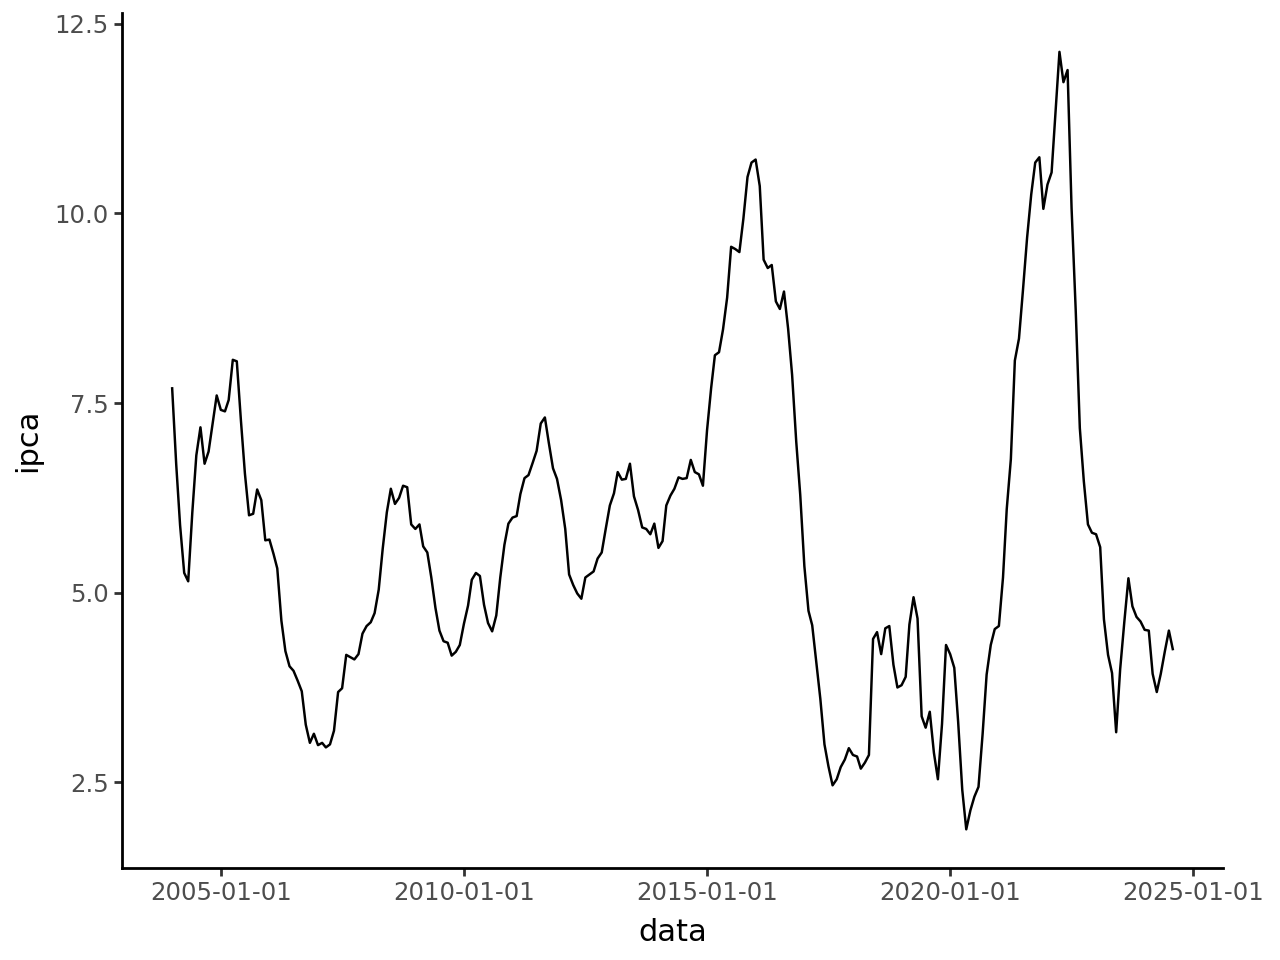

In [17]:
# Como a inflação se comportou no Brasil?
(
  p9.ggplot(dados_tratados_ipca) +
  p9.aes(x = "data", y = "ipca") +
  p9.geom_line() +
  p9.theme_classic()
)

In [18]:
# Qual o período com menores e maiores taxas de inflação?
print(dados_tratados_ipca.sort_values("ipca").set_index("data").iloc[0])
print(dados_tratados_ipca.query("ipca == ipca.max()"))

ipca    1.88
Name: 2020-05-01 00:00:00, dtype: float64
          data   ipca
509 2022-04-01  12.13


In [19]:
# Qual o valor médio da inflação do Brasil e como é a distribuição de seus valores?
dados_tratados_ipca.describe()

,data,ipca
count,248,248.000000
mean,2014-04-16 17:01:56.129032192,5.727782
min,2004-01-01 00:00:00,1.880000
25%,2009-02-22 00:00:00,4.227500
50%,2014-04-16 00:00:00,5.530000
75%,2019-06-08 12:00:00,6.652500
max,2024-08-01 00:00:00,12.130000
std,NaN,2.128850


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


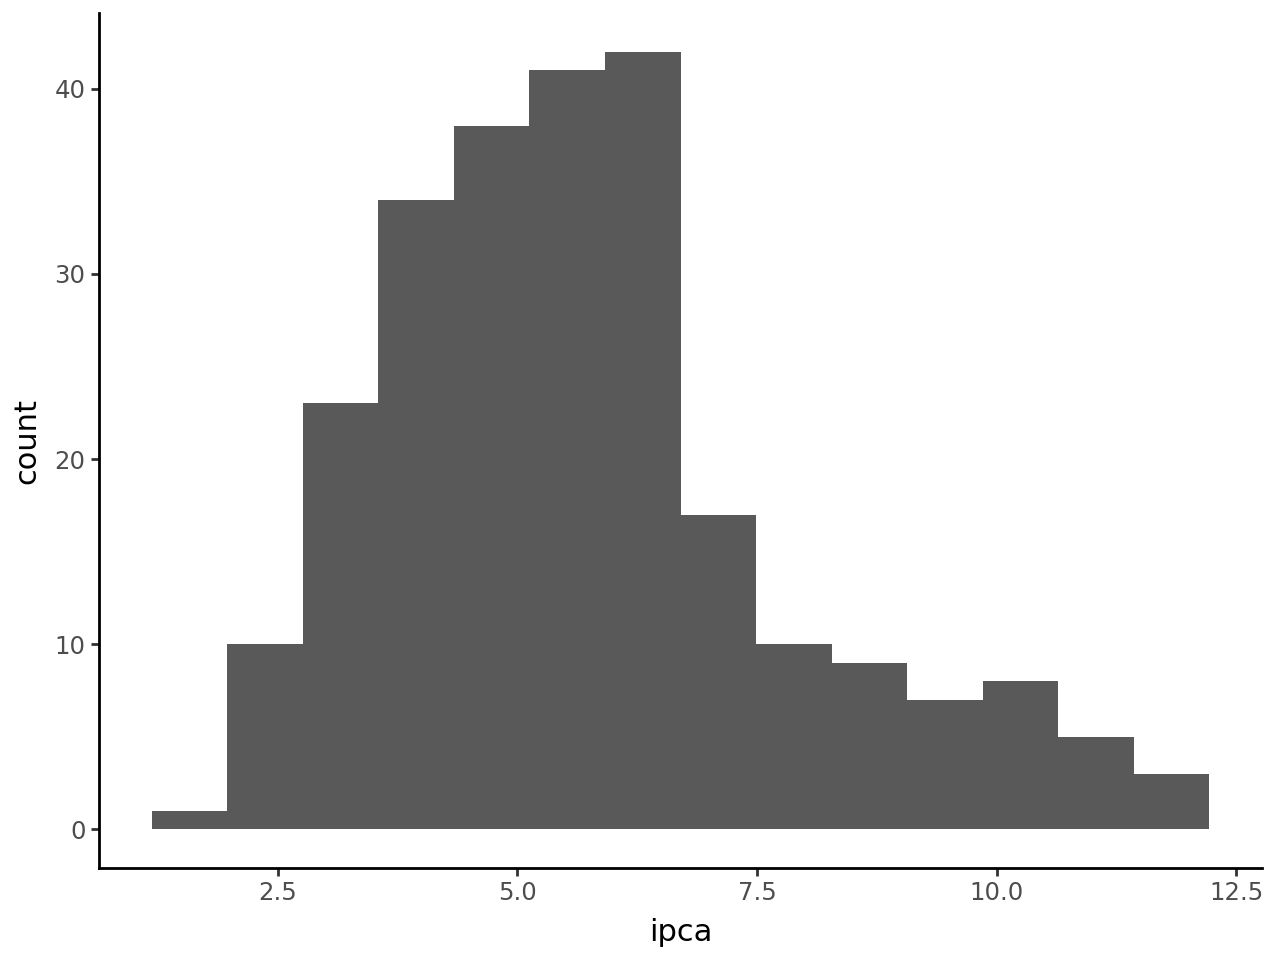

In [20]:
(
    p9.ggplot(dados_tratados_ipca) +
    p9.aes(x = "ipca") +
    p9.geom_histogram() +
    p9.theme_classic()
)

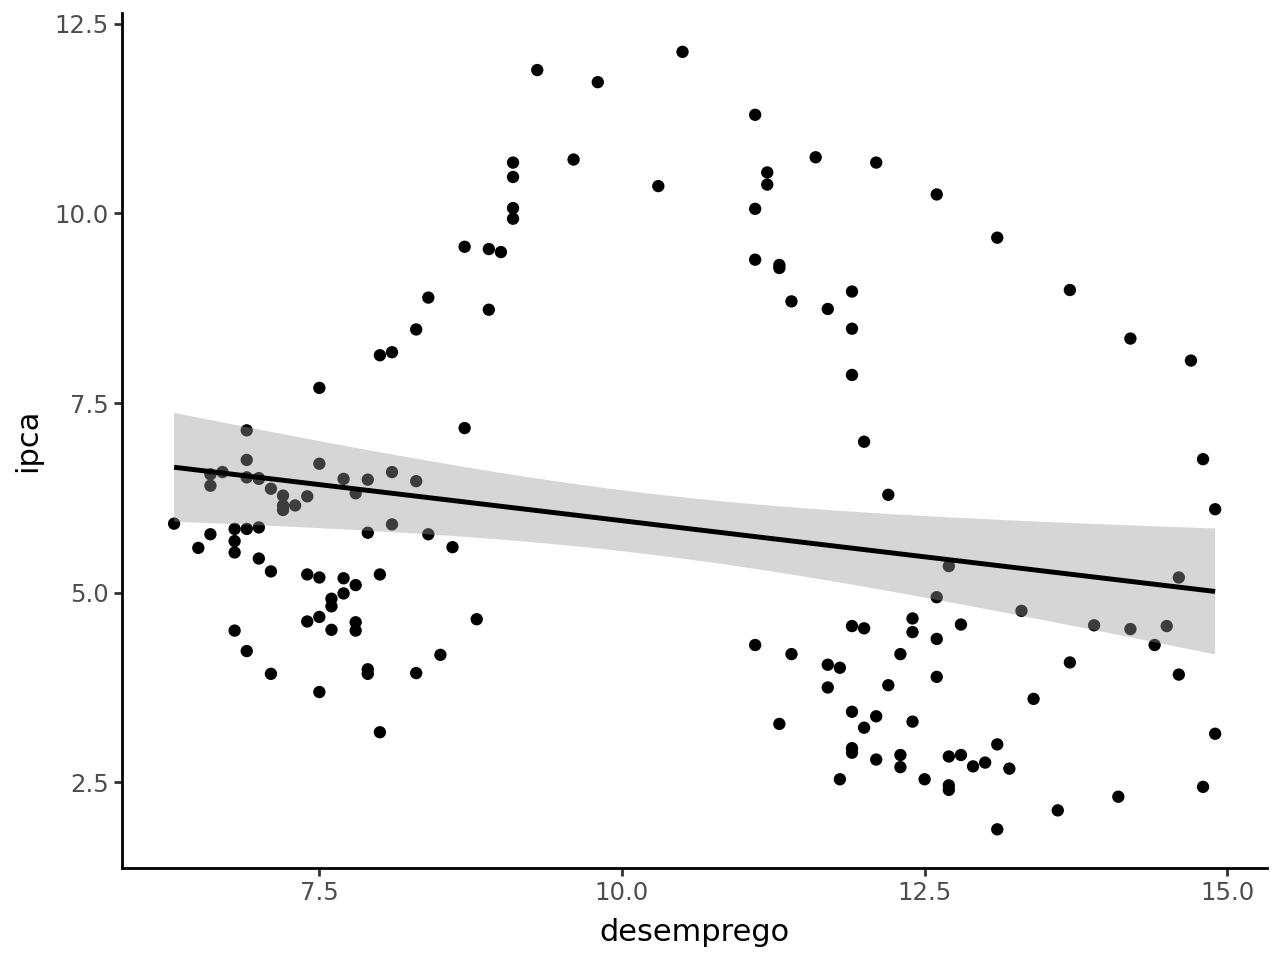

In [25]:
# O que afeta a inflação? Com qual variável ela se relaciona?
(
    p9.ggplot(dados_cruzados) +
    p9.aes(x = "desemprego", y = "ipca") +
    p9.geom_point() +
    p9.geom_smooth(method = "lm") +
    p9.theme_classic()
)

In [23]:
modelo = smf.ols("ipca ~desemprego", dados_cruzados).fit()
modelo

In [24]:
print(modelo.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.033   
Dependent Variable: ipca             AIC:                695.1581
Date:               2024-09-20 14:16 BIC:                701.1660
No. Observations:   149              Log-Likelihood:     -345.58 
Df Model:           1                F-statistic:        5.989   
Df Residuals:       147              Prob (F-statistic): 0.0156  
R-squared:          0.039            Scale:              6.1367  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      7.8527    0.8169   9.6123  0.0000   6.2382   9.4672
desemprego    -0.1904    0.0778  -2.4473  0.0156  -0.3442  -0.0366
-----------------------------------------------------------------
Omnibus:              16.364       Durbin-Watson:          0.043 
Prob(Omnibus):        